In [1]:
from wrapper.source.wrapper_class import BaseITS
from wrapper.source.pre_processing import *
from wrapper.source.poisson_regression import PoissonITS
from wrapper.source.prophet_model import ProphetITS

import pandas as pd

/Users/catherinewanjiru/projects/its-work-new/.wrapper/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Testing Wrapper function for prophet Model

In [5]:
# Prophet testing - Upper Wrapper class
outcomes = ["X1"]
["X2", "X3", "X4"]
locations = ["Gotham"]
["Neverland", "Tomorrowland", "Wakanda"]
interruption_dates = ["2020-04-30"]

regions_df = pd.read_csv("wrapper/data/wide_format_data.csv")
regions_df = dates_validation(regions_df, "ds")
regions_df = aggregation_wide_df_type(
    df=regions_df,
    location_col_name="location",
    date_col_name="ds",
    outcome_cols=["X1", "X2", "X3", "X4"],
)
# print(regions_df.columns.tolist())
# Do all the preprocessing
# regions_df = align_prophet_naming_convection(regions_df, 'periodname','Antenatal 4th Visit')
wrapperITS = BaseITS(
    model=["prophet"],
    location=locations,
    outcome=outcomes,
    interruption_date=interruption_dates,
    verbose=False,
)

one_regions_df = regions_df[regions_df.location == "Gotham"]
one_regions_df = one_regions_df[["ds", "location", "X1"]]

# Testing fit()
fitted_model = wrapperITS.fit(
    df=one_regions_df, X=one_regions_df["ds"], y=one_regions_df["X1"]
)
# Testing predict()
results = wrapperITS.predict(
    df=one_regions_df,
    X=one_regions_df["ds"],
    y=one_regions_df["X1"],
)

# print(results.values(), type(results))


# Testing fit_predict()
results = wrapperITS.fit_predict(
    df=one_regions_df,
    X=one_regions_df["ds"],
    y=one_regions_df["X1"],
)

print("Got out here")
print(results.columns.tolist())
print(results.info())
# Alter the outcome, location , dates, model columns to test multiple outputs


10:56:37 - cmdstanpy - INFO - Chain [1] start processing
10:56:38 - cmdstanpy - INFO - Chain [1] done processing
10:56:38 - cmdstanpy - INFO - Chain [1] start processing
10:56:38 - cmdstanpy - INFO - Chain [1] done processing


Got out here
['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat', 'y', 'change', 'percent_change']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          69 non-null     datetime64[ns]
 1   trend                       69 non-null     float64       
 2   yhat_lower                  69 non-null     float64       
 3   yhat_upper                  69 non-null     float64       
 4   trend_lower                 69 non-null     float64       
 5   trend_upper                 69 non-null     float64       
 6   additive_terms              69 non-null     float64       
 

### Testing Wrapper function for poisson Model

In [2]:

# .source.wrapper_class import BaseITS
# from source.pre_processing import *

import pandas as pd

# Poisson testing - Upper Wrapper class
outcomes = ["X1", "X2"]
["X2", "X3", "X4"]
locations = ["Gotham"]
["Neverland", "Tomorrowland", "Wakanda"]
interruption_dates = ["2020-04-30"]

poisson_df = pd.read_csv("wrapper/data/poisson_testing_df.csv")
poisson_df = dates_validation(poisson_df, "ds")

wrapperITS = BaseITS(
    model=["poisson"],
    location=locations,
    outcome=outcomes,
    interruption_date=interruption_dates,
    verbose=True,
)

one_regions_df = poisson_df[poisson_df.location == "Gotham"]
one_regions_df = one_regions_df[["ds", "location", "X1", "X2"]]
one_regions_df

# Testing fit()
wrapperITS.fit(df=one_regions_df, X=one_regions_df["ds"], y=one_regions_df["X1"])

# Testing predict()
results = wrapperITS.predict(
    df=one_regions_df,
    X=one_regions_df["ds"],
    y=one_regions_df[["X1", "X2"]],
)
print(results)
# Not expected to work because of Not Implemented Error
# Testing fit_predict()
results = wrapperITS.fit_predict(
    df=one_regions_df,
    X=one_regions_df["ds"],
    y=one_regions_df[["X1", "X2"]],
)


12 num_threads
Gotham - X1 - 2020-04-30 - poisson
prophet fit once


10:55:11 - cmdstanpy - INFO - Chain [1] start processing
10:55:11 - cmdstanpy - INFO - Chain [1] done processing
10:55:11 - cmdstanpy - INFO - Chain [1] start processing


Gotham - X2 - 2020-04-30 - poisson
prophet fit once


10:55:11 - cmdstanpy - INFO - Chain [1] done processing


2 1
12 num_threads
Gotham - X1 - 2020-04-30 - poisson
Gotham - X2 - 2020-04-30 - poisson
{'Gotham': {'X1': {'2020-04-30': {'poisson': {'forecast':            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2017-01-01  2847.458544  1213.294095  5102.657746  2847.458544   
1  2017-02-01  2876.369508  1625.349722  5511.218116  2876.369508   
2  2017-03-01  2902.482637   587.270625  4613.259624  2902.482637   
3  2017-04-01  2931.393602   846.769424  4962.998174  2931.393602   
4  2017-05-01  2959.371955  1313.442629  5237.951790  2959.371955   
5  2017-06-01  2988.282919    54.397655  4118.392524  2988.282919   
6  2017-07-01  3016.261272   648.754695  4519.546234  3016.261272   
7  2017-08-01  3045.163335  1444.914489  5347.348727  3045.163335   
8  2017-09-01  3074.065398  1856.301204  5630.772310  3074.065398   
9  2017-10-01  3102.035136   121.790454  4246.412804  3102.035136   
10 2017-11-01  3130.864662   405.085658  4423.847571  3130.864662   
11 2017-12-01  3158.73975

NotImplementedError: This function cannot be implemented because the predictions need to be transformed mannualy by the user

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/catherinewanjiru/Downloads/down.csv", delimiter="\t",header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float64
 1   1       20 non-null     float64
 2   2       20 non-null     float64
 3   3       20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


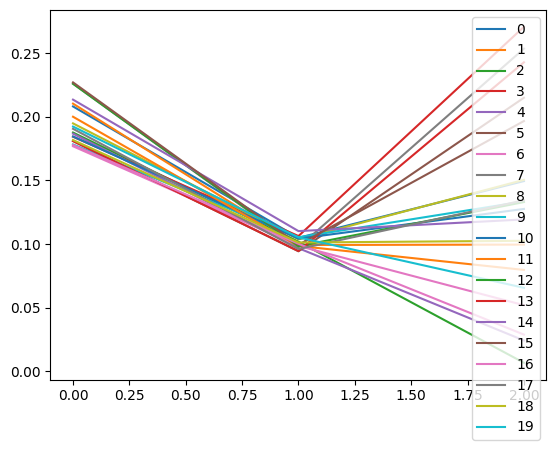

In [23]:
df[[0,1,2]].T.plot()
plt.show()

<AxesSubplot: >

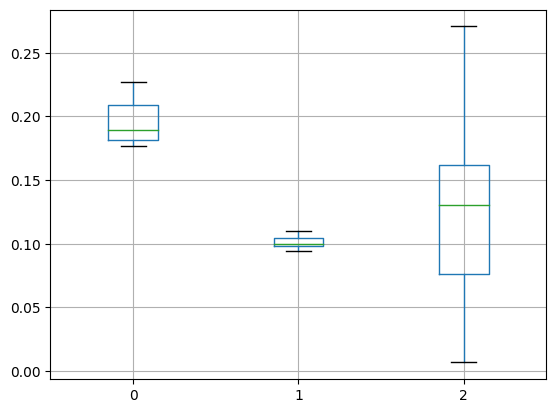

In [15]:
df[[0,1,2]].boxplot()

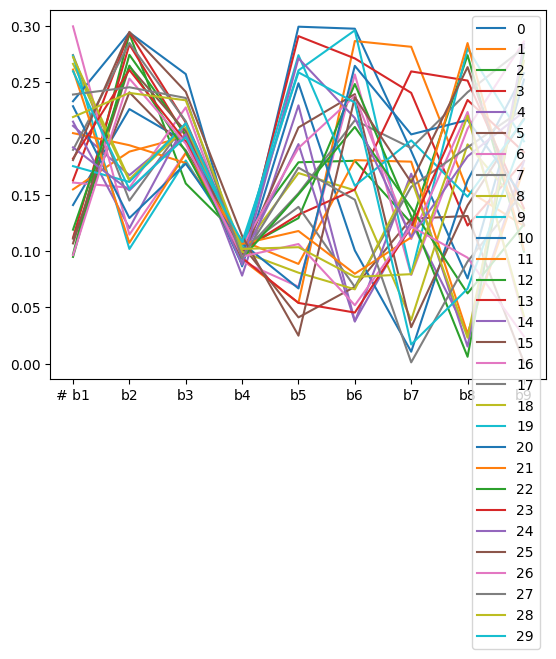

In [39]:
down9 = pd.read_csv("/Users/catherinewanjiru/Downloads/down_9(1).csv", delimiter="	")
down9.loc[:,'# b1':'b9'].T.plot()
plt.show()

In [40]:
down9.loc[:,'# b1':'b9'].T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
# b1,0.140893,0.154761,0.097177,0.111899,0.211217,0.111039,0.160845,0.274061,0.266256,0.273399,...,0.228619,0.261168,0.119011,0.182114,0.192111,0.180816,0.096432,0.239005,0.219011,0.259667
b2,0.226077,0.188321,0.292951,0.283482,0.167374,0.240975,0.156227,0.144857,0.162437,0.101917,...,0.129331,0.107357,0.264707,0.260813,0.153757,0.294617,0.253140,0.245456,0.240416,0.154977
b3,0.196930,0.201711,0.160025,0.201673,0.208926,0.189461,0.227594,0.213901,0.209478,0.180393,...,0.177669,0.186983,0.188198,0.197293,0.203849,0.241453,0.195356,0.235943,0.233875,0.201169
b4,0.087593,0.092521,0.110217,0.093695,0.078225,0.105397,0.090723,0.097509,0.101825,0.100716,...,0.107108,0.106352,0.093479,0.093949,0.087985,0.113525,0.095173,0.093705,0.101910,0.108163
b5,0.299233,0.054086,0.178857,0.290849,0.229383,0.041143,0.068401,0.151361,0.169284,0.260444,...,0.066857,0.117829,0.150318,0.053986,0.271177,0.024927,0.106268,0.174067,0.103454,0.258657
b6,0.297445,0.286484,0.180173,0.271060,0.037852,0.068313,0.256847,0.216085,0.153927,0.295988,...,0.264476,0.079882,0.210249,0.045422,0.218127,0.236595,0.051949,0.145604,0.077078,0.231911
b7,0.188793,0.281386,0.124907,0.240484,0.126048,0.128789,0.078773,0.191476,0.038803,0.079504,...,0.203607,0.112176,0.138391,0.121350,0.112555,0.160965,0.121807,0.001219,0.079529,0.017087
b8,0.075690,0.153891,0.273934,0.122720,0.026767,0.131156,0.208657,0.241068,0.194737,0.279988,...,0.216376,0.284701,0.062491,0.234142,0.184053,0.263334,0.094165,0.090754,0.220248,0.066587
b9,0.252264,0.122372,0.099488,0.180119,0.179685,0.001268,0.286131,0.280519,0.136140,0.197504,...,0.147020,0.101287,0.123614,0.187864,0.223804,0.123055,0.024395,0.152922,0.042334,0.203398
